In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

In [2]:
xtest = pd.read_csv('X_test.csv', header=None)
ytest = pd.read_csv('y_test.csv', header=None)
xtrain = pd.read_csv('X_train.csv', header=None)
ytrain = pd.read_csv('y_train.csv', header=None)

In [3]:
#setting values for now. Will need to loop through later
b = 5
var = 0.1

In [16]:
def kernelize(x1, x2, b):
    kern_output = np.exp(-1/b * np.linalg.norm(x1 - x2) ** 2)
    return kern_output

In [79]:
full_kern_mat = []

#RBF b values as defined in assignment

for b in (5, 7, 9, 11, 13, 15):
    kern_mat = []
    for i in range(len(xtrain)):
        kern_array = []
        for j in range(len(xtrain)):
            kern_array.append(kernelize(xtrain.loc[i], xtrain.loc[j], b))
        kern_mat.append(kern_array)
    full_kern_mat.append(kern_mat)

In [100]:
full_kern_mat = np.array(full_kern_mat)

In [93]:
#create identity matrix
i_mat = np.identity(len(xtrain))

In [125]:
#statically calculate last part of Gaussian Process prediction equation
#variance values as defined in assignment

multiplier = []

for var in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]: 
    var_mat = var * i_mat
    temp_array = []
    for b in range(len(full_kern_mat)):
        temp_array.append(np.dot(np.linalg.inv(var_mat + full_kern_mat[b]), ytrain))
    multiplier.append(temp_array)    
    
multiplier = np.squeeze(np.array(multiplier))

In [173]:
estimate_matrix = []

#for var in [0]:
for var in range(len(multiplier)):
    temp_matrix = []
    for b in range(multiplier.shape[1]):
        real_b = 2*b+5 #changes 0-6 index to 5, 7, 9, etc.
        est_array = []   
        for i in range(len(xtest)):
            kern_array = []
            for j in range(len(xtrain)):
                kern_array.append(kernelize(xtest.loc[i], xtrain.loc[j], real_b))
            z1 = np.transpose(pd.DataFrame(kern_array))
            z2 = np.reshape(multiplier[var][b], ((len(multiplier[0][0]), 1))) 
            est_array.append(np.dot(z1, z2))
        est_array = np.squeeze(est_array)
        temp_matrix.append(est_array)
    estimate_matrix.append(temp_matrix)

In [191]:
estimate_matrix = np.array(estimate_matrix)

In [219]:
rmse = []

for i in range(estimate_matrix.shape[0]):
    temp_rmse = []
    for j in range(estimate_matrix.shape[1]):
        #for x in estimate_matrix.shape[2]:
            #temp_var += (estimate_matrix[i][j] - np.squeeze(ytest))**2  
        temp_rmse.append(np.sqrt(mean_squared_error(estimate_matrix[i][j], np.squeeze(ytest)))) #FIX
    rmse.append(temp_rmse)

In [220]:
rmse = pd.DataFrame(rmse) #row 0 col 3 is min

In [221]:
rmse = rmse.set_index([[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]])

In [222]:
rmse.rename(columns={0:5, 1:7, 2:9, 3:11, 4:13, 5:15}, inplace=True)

In [223]:
rmse

,5,7,9,11,13,15
0.1,1.966276,1.920163,1.897649,1.890507,1.895849,1.909603
0.2,1.933135,1.904877,1.902519,1.914981,1.935586,1.959549
0.3,1.923420,1.908080,1.917648,1.938849,1.964597,1.990804
0.4,1.922198,1.915902,1.932514,1.957936,1.985502,2.011915
0.5,1.924769,1.924804,1.945699,1.973216,2.001314,2.027370
0.6,1.929213,1.933701,1.957235,1.985764,2.013878,2.039465
0.7,1.934634,1.942254,1.967403,1.996375,2.024310,2.049463
0.8,1.940583,1.950380,1.976492,2.005603,2.033307,2.058105
0.9,1.946820,1.958093,1.984741,2.013835,2.041317,2.065845
1.0,1.953213,1.965438,1.992341,2.021345,2.048642,2.072976


# Part D

In [227]:
carweight = xtrain[3]

In [229]:
weight_kern_mat = []

#RBF b values as defined in assignment

for b in [5]:
    kern_mat = []
    for i in range(len(xtrain)):
        kern_array = []
        for j in range(len(xtrain)):
            kern_array.append(kernelize(carweight.loc[i], carweight.loc[j], b))
        kern_mat.append(kern_array)
    weight_kern_mat.append(kern_mat)

In [230]:
weight_kern_mat = np.array(weight_kern_mat)

In [266]:
weight_multiplier = []

for var in [2]: 
    var_mat = var * i_mat
    temp_array = []
    for b in range(len(weight_kern_mat)):
        temp_array.append(np.dot(np.linalg.inv(var_mat + weight_kern_mat[b]), ytrain))
    weight_multiplier.append(temp_array)    
    
weight_multiplier = np.array(weight_multiplier)[:, :, :, 0]

In [241]:
#weight_multiplier = np.reshape(weight_multiplier, ((len(weight_multiplier), 1))) 

In [270]:
weight_estimate_matrix = []

#for var in [0]:
for var in range(len(weight_multiplier)):
    temp_matrix = []
    for b in range(weight_multiplier.shape[1]):
        real_b = 2*b+5 #changes 0-6 index to 5, 7, 9, etc.
        est_array = []   
        for i in range(len(carweight)): #xtest may be problem!
            kern_array = []
            for j in range(len(carweight)):
                kern_array.append(kernelize(carweight.loc[i], carweight.loc[j], real_b))
            z1 = np.transpose(pd.DataFrame(kern_array))
            #z2 = np.reshape(weight_multiplier[var][b], ((len(weight_multiplier), 1))) 
            z2 = np.reshape(weight_multiplier[var][b], ((len(weight_multiplier[0][0]), 1))) 
            est_array.append(np.dot(z1, z2))
        est_array = np.squeeze(est_array)
        temp_matrix.append(est_array)
    weight_estimate_matrix.append(temp_matrix)

In [286]:
weight_estimate_matrix = np.squeeze(weight_estimate_matrix)

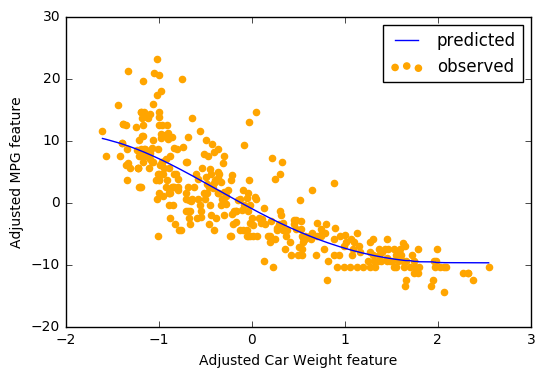

In [366]:
fig = plt.figure()
labels = ['predicted', 'observed']

points = plt.scatter(carweight, ytrain[0])
#lines = plt.plot(carweight, weight_estimate_matrix)
#line = plt.scatter(carweight, weight_estimate_matrix)
example = plt.plot(np.sort(carweight), -np.sort(-weight_estimate_matrix))

plt.setp(points, color='orange')

plt.legend(labels)
plt.xlabel('Adjusted Car Weight feature')
plt.ylabel('Adjusted MPG feature')

plt.show()

In [368]:
!jupyter nbconvert --to script Gaussian_Process.ipynb

[NbConvertApp] Converting notebook Gaussian_Process.ipynb to script
[NbConvertApp] Writing 5354 bytes to Gaussian_Process.py
